In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config_file = '../configs/cascade_rcnn_r101_fpn_1x_Aug_focal_dcn.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../work_dirs/cascade_rcnn_r101_fpn_1x_focal_dcn/latest.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [119]:
# test a single image
img = '../data/VOCdevkit/VOC2007/JPEGImages/016081.jpg'
#img = 'demo.jpg'
result = inference_detector(model, img)

In [32]:
from mmdet.datasets import VOCDataset
data_root = '../data/VOCdevkit/'
ann_file = data_root + 'VOC2007/ImageSets/Main/test.txt'
img_prefix = data_root + 'VOC2007/'
img_scale = (1152, 1200)
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
voc_dataset = VOCDataset(ann_file=ann_file, img_prefix=img_prefix, img_scale=img_scale, img_norm_cfg=img_norm_cfg)

In [33]:
img_infos = voc_dataset.load_annotations(ann_file)

In [92]:
ann = voc_dataset.get_ann_info(3724)

In [93]:
ann

{'bboxes': array([[826., 211., 862., 299.],
        [330., 131., 657., 488.],
        [140., 278., 247., 447.],
        [821., 331., 945., 518.],
        [766., 161., 848., 208.]], dtype=float32),
 'labels': array([11, 16,  5, 15,  5]),
 'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
 'labels_ignore': array([], dtype=int64)}

In [91]:
img_infos[3724].get('id')

'016080'

In [74]:
for i,img_info in enumerate(img_infos):
    ann = voc_dataset.get_ann_info(i)
    for label in ann['labels']:
        if label == 5 or label == 11:
            print(i)
            break

3
7
9
13
14
15
18
22
23
25
31
32
37
39
44
46
47
51
52
56
57
62
64
65
68
69
71
72
76
81
82
83
84
85
86
87
92
93
96
97
99
116
127
129
130
131
135
148
156
158
235
349
379
385
386
394
396
403
405
407
435
436
437
438
439
440
441
442
443
444
474
557
702
803
804
805
806
807
809
810
811
851
860
861
864
870
875
878
883
892
893
894
899
913
919
925
928
939
941
945
953
957
958
959
965
972
974
975
982
984
989
993
1007
1020
1023
1026
1028
1030
1036
1040
1041
1043
1046
1048
1049
1050
1052
1054
1060
1064
1066
1070
1073
1074
1078
1080
1081
1083
1088
1090
1091
1093
1094
1097
1098
1100
1101
1104
1105
1109
1110
1111
1112
1113
1114
1116
1118
1120
1121
1124
1129
1130
1132
1134
1135
1138
1231
1232
1235
1240
1244
1248
1250
1252
1253
1259
1264
1265
1269
1270
1271
1272
1276
1284
1289
1291
1292
1298
1299
1300
1301
1313
1318
1322
1323
1337
1346
1349
1351
1354
1356
1357
1361
1366
1371
1375
1382
1393
1396
1403
1404
1406
1411
1413
1417
1419
1451
1471
1486
1488
1494
1496
1499
1510
1516
1524
1525
1528
1533
1536
1537
1

In [106]:
from enum import Enum

import numpy as np

from mmcv.utils import is_str
class Color(Enum):
    """An enum that defines common colors.
    Contains red, green, blue, cyan, yellow, magenta, white and black.
    """
    red = (0, 0, 255)
    green = (0, 255, 0)
    blue = (255, 0, 0)
    cyan = (255, 255, 0)
    yellow = (0, 255, 255)
    magenta = (255, 0, 255)
    white = (255, 255, 255)
    black = (0, 0, 0)


def color_val(color):
    """Convert various input to color tuples.
    Args:
        color (:obj:`Color`/str/tuple/int/ndarray): Color inputs
    Returns:
        tuple[int]: A tuple of 3 integers indicating BGR channels.
    """
    if is_str(color):
        return Color[color].value
    elif isinstance(color, Color):
        return color.value
    elif isinstance(color, tuple):
        assert len(color) == 3
        for channel in color:
            assert channel >= 0 and channel <= 255
        return color
    elif isinstance(color, int):
        assert color >= 0 and color <= 255
        return color, color, color
    elif isinstance(color, np.ndarray):
        assert color.ndim == 1 and color.size == 3
        assert np.all((color >= 0) & (color <= 255))
        color = color.astype(np.uint8)
        return tuple(color)
    else:
        raise TypeError('Invalid type for color: {}'.format(type(color)))

In [117]:
import cv2
def imshow_det_bboxes(img,
                      bboxes,
                      labels,
                      class_names=None,
                      score_thr=0,
                      bbox_color='green',
                      text_color='green',
                      thickness=1,
                      font_scale=0.5,
                      show=True,
                      win_name='',
                      wait_time=0,
                      out_file=None):
    """Draw bboxes and class labels (with scores) on an image.
    Args:
        img (str or ndarray): The image to be displayed.
        bboxes (ndarray): Bounding boxes (with scores), shaped (n, 4) or
            (n, 5).
        labels (ndarray): Labels of bboxes.
        class_names (list[str]): Names of each classes.
        score_thr (float): Minimum score of bboxes to be shown.
        bbox_color (str or tuple or :obj:`Color`): Color of bbox lines.
        text_color (str or tuple or :obj:`Color`): Color of texts.
        thickness (int): Thickness of lines.
        font_scale (float): Font scales of texts.
        show (bool): Whether to show the image.
        win_name (str): The window name.
        wait_time (int): Value of waitKey param.
        out_file (str or None): The filename to write the image.
    """
    assert bboxes.ndim == 2
    assert labels.ndim == 1
    assert bboxes.shape[0] == labels.shape[0]
    assert bboxes.shape[1] == 4 or bboxes.shape[1] == 5
    img = mmcv.imread(img)

    if score_thr > 0:
        assert bboxes.shape[1] == 5
        scores = bboxes[:, -1]
        inds = scores > score_thr
        bboxes = bboxes[inds, :]
        labels = labels[inds]

    bbox_color = color_val(bbox_color)
    text_color = color_val(text_color)

    for bbox, label in zip(bboxes, labels):
        bbox_int = bbox.astype(np.int32)
        left_top = (bbox_int[0], bbox_int[1])
        right_bottom = (bbox_int[2], bbox_int[3])
        cv2.rectangle(
            img, left_top, right_bottom, bbox_color, thickness=thickness)
        print(label)
        #print(class_names)
        print(class_names[label-1])
        label_text = class_names[
            label-1] if class_names is not None else 'cls {}'.format(label)
        if len(bbox) > 4:
            label_text += '|{:.02f}'.format(bbox[-1])
        print(label_text)
        cv2.putText(img, label_text, (bbox_int[0], bbox_int[1] - 2),
                    cv2.FONT_HERSHEY_COMPLEX, font_scale, text_color, thickness=2)

    if show:
        imshow(img, win_name, wait_time)
    if out_file is not None:
        imwrite(img, out_file)
def show_result(img,
                result,
                class_names,
                score_thr=0.3,
                wait_time=0,
                show=True,
                out_file=None):
    """Visualize the detection results on the image.

    Args:
        img (str or np.ndarray): Image filename or loaded image.
        result (tuple[list] or list): The detection result, can be either
            (bbox, segm) or just bbox.
        class_names (list[str] or tuple[str]): A list of class names.
        score_thr (float): The threshold to visualize the bboxes and masks.
        wait_time (int): Value of waitKey param.
        show (bool, optional): Whether to show the image with opencv or not.
        out_file (str, optional): If specified, the visualization result will
            be written to the out file instead of shown in a window.

    Returns:
        np.ndarray or None: If neither `show` nor `out_file` is specified, the
            visualized image is returned, otherwise None is returned.
    """
    assert isinstance(class_names, (tuple, list))
    img = mmcv.imread(img)
    #img = cv2.resize(img, (600,600))
    img = img.copy()
    if isinstance(result, tuple):
        bbox_result, segm_result = result
    else:
        bbox_result, segm_result = result, None
    bboxes = np.vstack(bbox_result)
    # draw segmentation masks
    if segm_result is not None:
        segms = mmcv.concat_list(segm_result)
        inds = np.where(bboxes[:, -1] > score_thr)[0]
        for i in inds:
            color_mask = np.random.randint(0, 256, (1, 3), dtype=np.uint8)
            mask = maskUtils.decode(segms[i]).astype(np.bool)
            img[mask] = img[mask] * 0.5 + color_mask * 0.5
    # draw bounding boxes
    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32)
        for i, bbox in enumerate(bbox_result)
    ]
    labels = np.concatenate(labels)
    imshow_det_bboxes(
        img,
        bboxes,
        labels,
        class_names=class_names,
        score_thr=score_thr,
        bbox_color='red',
        text_color='blue',
        thickness=2,
        font_scale=1.0,
        show=show,
        wait_time=wait_time,
        out_file=out_file)
    if not (show or out_file):
        return img
def show_result_pyplot(img,
                       result,
                       class_names,
                       score_thr=0.3,
                       fig_size=(15, 10)):
    """Visualize the detection results on the image.

    Args:
        img (str or np.ndarray): Image filename or loaded image.
        result (tuple[list] or list): The detection result, can be either
            (bbox, segm) or just bbox.
        class_names (list[str] or tuple[str]): A list of class names.
        score_thr (float): The threshold to visualize the bboxes and masks.
        fig_size (tuple): Figure size of the pyplot figure.
        out_file (str, optional): If specified, the visualization result will
            be written to the out file instead of shown in a window.
    """
    img = show_result(
        img, result, class_names, score_thr=score_thr, show=False)
    plt.figure(figsize=fig_size)
    plt.imshow(mmcv.bgr2rgb(img))

11
black
black
16
computer
computer
5
glass
glass
15
phone
phone
5
glass
glass
11
black
black|0.99
12
power
power|0.96
13
scissors
scissors|0.95


<Figure size 1080x720 with 0 Axes>

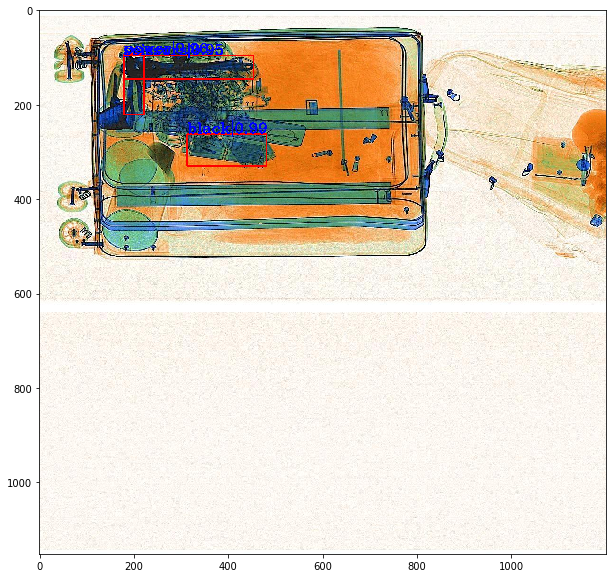

In [120]:
img_gt=imshow_det_bboxes(
        img,
        ann['bboxes'],
        ann['labels'],
        class_names=model.CLASSES,
        score_thr=0,
        bbox_color='red',
        text_color='blue',
        thickness=2,
        font_scale=1.0,
        show=False,
        out_file=None)
plt.figure(figsize=(15, 10))
# show the results
show_result_pyplot(img, result, model.CLASSES)

In [99]:
# plot groundtruth
image = mmcv.bgr2rgb(mmcv.imread(img))
bboxes = ann['bboxes']
labels = ann['labels']
text_color=(0, 0, 255)
bbox_color=(255, 0, 0)
for bbox, label in zip(bboxes, labels):
    bbox_int = bbox.astype(np.int32)
    left_top = (bbox_int[0], bbox_int[1])
    right_bottom = (bbox_int[2], bbox_int[3])
    cv2.rectangle(
        image, left_top, right_bottom, bbox_color, thickness=2)
    label_text = model.CLASSES[
        label-1] if model.CLASSES is not None else 'cls {}'.format(label)
    if len(bbox) > 4:
        label_text += '|{:.02f}'.format(bbox[-1])
    cv2.putText(image, label_text, (bbox_int[0], bbox_int[1] - 2),
                cv2.FONT_HERSHEY_COMPLEX, 1.0, text_color, thickness=2)

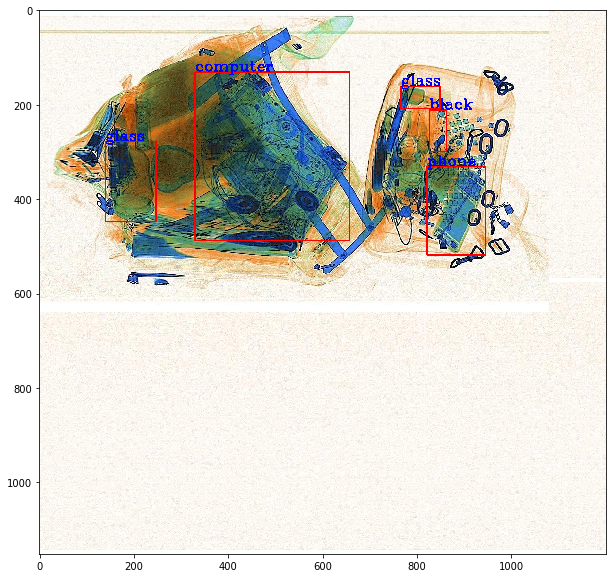

In [100]:
plt.figure(figsize=(15, 10))
plt.imshow(image)